In [24]:
from sklearn import datasets
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans

In [25]:
iris = datasets.load_iris()

In [26]:
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [27]:
X= iris_df.iloc[:, :4].values
y = iris.target
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

Lets visualize the number the data and try to guess the number of clusters.

Text(0, 0.5, 'Sepal Width')

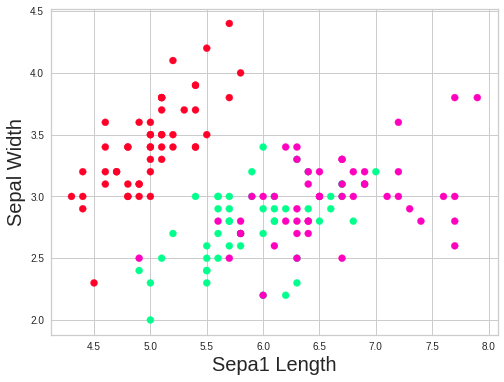

In [28]:
plt.figure(figsize=(8,6))
plt.scatter(X[:,0], X[:,1], c=y,cmap='gist_rainbow')
plt.xlabel('Sepa1 Length', fontsize=20)
plt.ylabel('Sepal Width', fontsize=20)


So as we can see the number of clusters are 3, As we have a labelled data its very east for us to see the actual classes.What if we have had unlabelled data then How to find the optimal number of clusters?

We will see two methods to analyze the optimum number of clusters in any unspervised task

**Elbow Method**
[link text](https://en.wikipedia.org/wiki/Elbow_method_(clustering#:~:text=In%20cluster%20analysis%2C%20the%20elbow,number%20of%20clusters%20to%20use.)

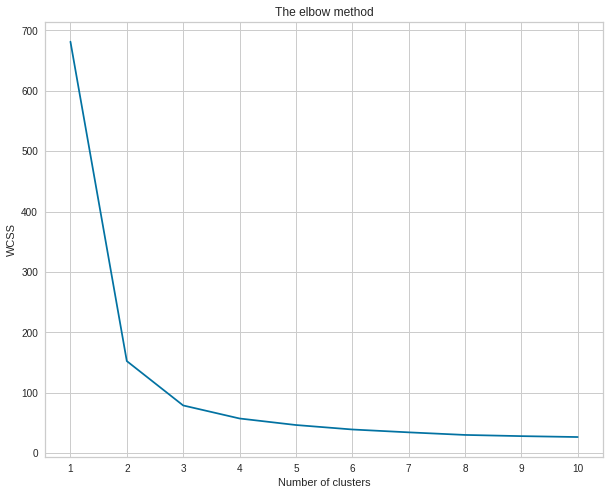

In [29]:
#x = iris_df.iloc[:, [0, 1, 2, 3]].values

from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    
# Plotting the results onto a line graph, 
# `allowing us to observe 'The elbow'
plt.figure(figsize=(10,8))
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.xticks(range(1,11),[str(i) for i in range(1,11)])
plt.show()

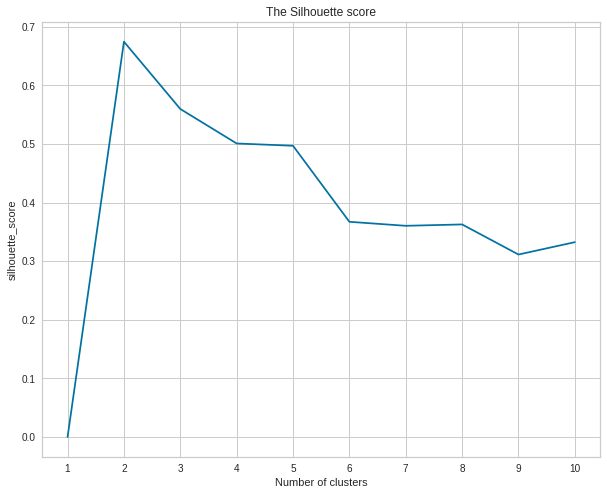

In [30]:
from sklearn.metrics import silhouette_score

sil = [0]
kmax = 10
#xs=iris_df.iloc[:, [0,1,3]].values
# dissimilarity would not be defined for a single cluster, thus, minimum number of clusters should be 2
for k in range(2, kmax+1):
  kmeans = KMeans(n_clusters = k).fit(X)
  labels = kmeans.labels_
  sil.append(silhouette_score(X, labels, metric = 'manhattan'))

# Plotting the results onto a line graph, 
# `allowing us to observe 'The elbow'
plt.figure(figsize=(10,8))
plt.plot(range(1, 11), sil)
plt.title('The Silhouette score')
plt.xlabel('Number of clusters')
plt.ylabel('silhouette_score') # Within cluster sum of squares
plt.xticks(range(1,11),[str(i) for i in range(1,11)])
plt.show()

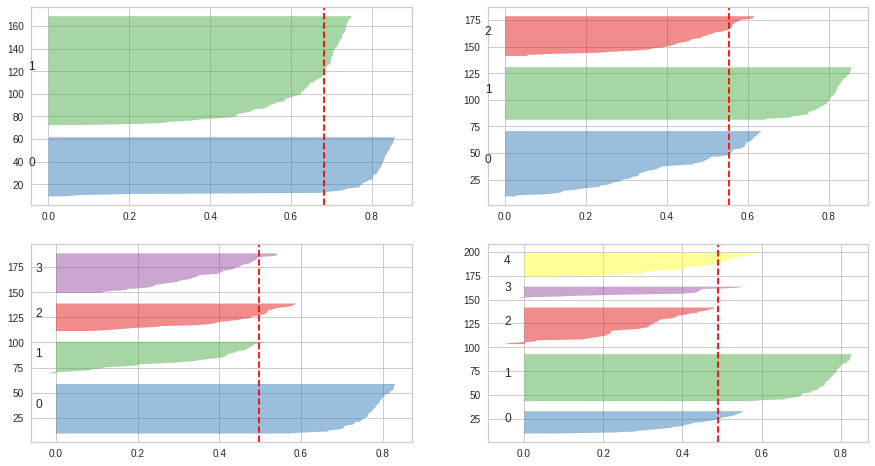

In [31]:
from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(2, 2, figsize=(15,8))
for i in [2, 3, 4, 5]:
    '''
    Create KMeans instance for different number of clusters
    '''
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(X)

In [32]:
km = KMeans(n_clusters = 3, n_jobs = 4, random_state=21)
km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=4, precompute_distances='auto',
       random_state=21, tol=0.0001, verbose=0)

Text(0.5, 1.0, 'Predicted')

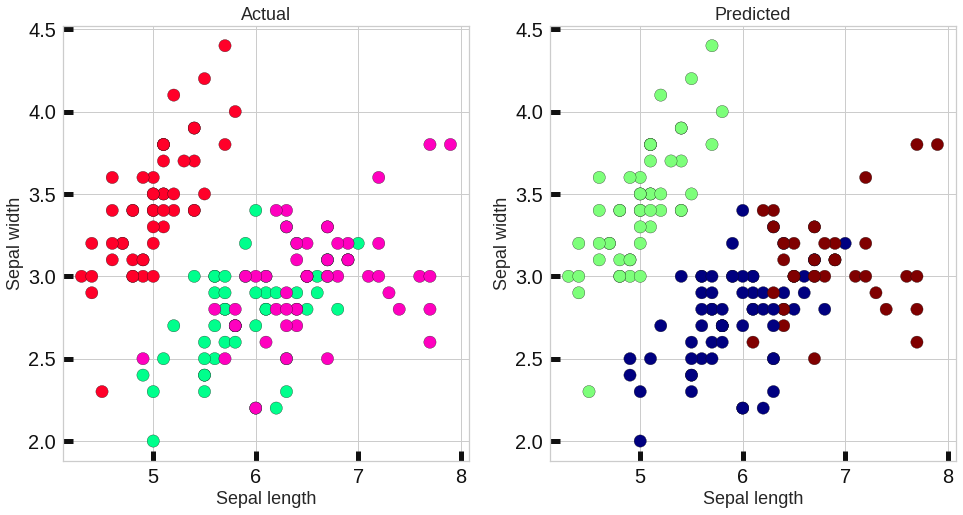

In [33]:
#this will tell us to which cluster does the data observations belong.
new_labels = km.labels_
# Plot the identified clusters and compare with the answers
fig, axes = plt.subplots(1, 2, figsize=(16,8))
axes[0].scatter(X[:, 0], X[:, 1], c=y, cmap='gist_rainbow',
edgecolor='k', s=150)
axes[1].scatter(X[:, 0], X[:, 1], c=new_labels, cmap='jet',
edgecolor='k', s=150)
axes[0].set_xlabel('Sepal length', fontsize=18)
axes[0].set_ylabel('Sepal width', fontsize=18)
axes[1].set_xlabel('Sepal length', fontsize=18)
axes[1].set_ylabel('Sepal width', fontsize=18)
axes[0].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[1].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[0].set_title('Actual', fontsize=18)
axes[1].set_title('Predicted', fontsize=18)

Evaluating the clustering

The Rand Index computes a similarity measure between two clusterings by considering all pairs of samples and counting pairs that are assigned in the same or different clusters in the predicted and true clusterings.

Fowlkes Mallows score

Where TP is the number of True Positive (i.e. the number of pair of points that belongs in the same clusters in both labels_true and labels_pred), FP is the number of False Positive (i.e. the number of pair of points that belongs in the same clusters in labels_true and not in labels_pred) and FN is the number of False Negative (i.e the number of pair of points that belongs in the same clusters in labels_pred and not in labels_True).

The score ranges from 0 to 1. A high value indicates a good similarity between two clusters.

In [34]:
from sklearn.metrics.cluster import fowlkes_mallows_score
print("fowlkes mallows score=",fowlkes_mallows_score(y,new_labels))

from sklearn.metrics.cluster import adjusted_rand_score
print("adjusted rand score=",adjusted_rand_score(y,new_labels))

fowlkes mallows score= 0.8208080729114153
adjusted rand score= 0.7302382722834697
